In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


df_comercio=pd.read_csv("comercio_df.csv",sep=",")
df_correo=pd.read_csv("correo_df.csv",sep=",")
#df_comercio.cuerpo

In [2]:
df_comercio['dia']=pd.to_datetime(df_comercio['dia'].str.strip(),format='%d-%m-%Y')
df_comercio['medio']='comercio'
df_correo['dia']=pd.to_datetime(df_correo['dia'].str.strip(),format='%d-%m-%Y')
df_correo['medio']='correo'

In [3]:
slaisin1=df_comercio[df_comercio['dia']<'03-01-2017']
slaisin2=df_correo[df_correo['dia']<'03-01-2017']
test=pd.concat([slaisin1,slaisin2],axis=0)

In [4]:
test

,link,headline,bajada,antetitulo,cuerpo,dia,etiquetas
0,https://elcomercio.pe/vamos/peru/10-destinos-p...,10 destino playa preferido turista peruano,segun estudio kayak miami destino plair mas so...,Perú,10 destino playa preferido turista peruano 10 ...,2017-01-09,"destinos, playa"
1,https://elcomercio.pe/mundo/europa/bbc-cerca-s...,bbc cerca sarcofago gigante chernobil,construccion demoro tres decada estructura mov...,,lider mundo ejecutivo empresa global hombre ve...,2017-01-09,"BBC, Chernóbil"
2,https://elcomercio.pe/opinion/habla-culta/mart...,martha hildebrandt significado ventanillero,seccion hablar culto reconocido lingüista expl...,Habla culta,adjetivo sustantivado derivado ventanilla aber...,2017-01-09,"Martha Hildebrandt, Habla culta"
3,https://elcomercio.pe/politica/gobierno/judici...,poder judicial esperar terminar marzo juicio u...,juicio iniciado 2015 sufrido dilación tribunal...,Gobierno,colegiado b sala penal nacional poder judicial...,2017-01-09,Daniel Urresti
4,https://elcomercio.pe/mundo/eeuu/atacante-fort...,atacante fort lauderdale comparecio justicia,audiencia jueza alicia valle hacer saber afron...,EEUU,veterano guerra iraq ester santiago comparecio...,2017-01-09,"Fort Lauderdale, Estados Unidos"
...,...,...,...,...,...,...,...
3035,https://diariocorreo.pe/edicion/huancayo/la-or...,oroyar 17 estudiante ingresar coar junin,continuarar estudio 3ro 5to secundario,Huancayo,17 estudiante diferente institución educativo ...,2017-02-28,La Oroya
3036,https://diariocorreo.pe/miscelanea/xoana-gonza...,xoán gonzalez inaugurar consultorio sexo amor ...,xoán gonzalez vuelve sorprender instagram ahor...,Tendencia,xoán gonzalez volvio hacer instagram mas sorpr...,2017-02-28,"Xoana González, Instagram"
3037,https://diariocorreo.pe/cultura/emma-watson-se...,emma watson oponer selfies fenomeno harry pott...,watson estudiar literatura inglés universidad ...,Cultura,reciente entrevista revista vanity fair joven ...,2017-02-28,"Emma Watson, la bella y la bestia, Libros"
3038,https://diariocorreo.pe/politica/los-desayunos...,basombrio alentar violencia red social poder i...,ministro interior calificar cobard persona usa...,Política,ministro interior carlos basombrio aseguro hoy...,2017-02-28,"PNP, Alejandro Toledo, Carlos Basombrío"


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

tfidf = TfidfVectorizer(
    max_df=0.9,
    min_df=5,
)
tfidf.fit(test.cuerpo)
text = tfidf.transform(test.cuerpo)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


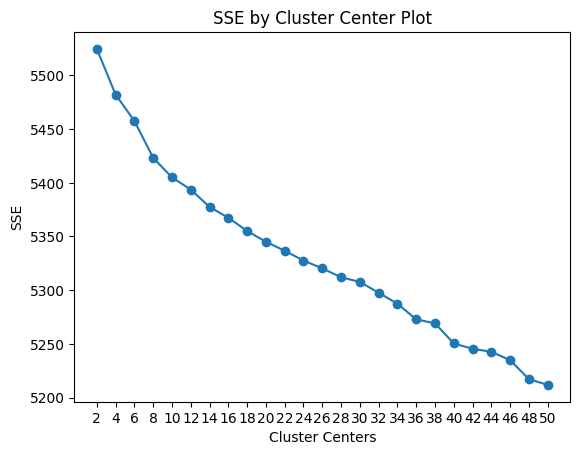

In [14]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 50)

In [30]:
n=10
clusters = MiniBatchKMeans(n_clusters=n, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.manifold import TSNE
import plotly.express as px

# Paso 3: Reducción de dimensionalidad t-SNE a 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# Convertir a DataFrame para facilitar la manipulación
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
tsne_df['cluster'] = clusters

# Agregar los atributos adicionales que deseas mostrar al pasar el cursor
tsne_df['Atributo1'] = ['valor1'] * len(tsne_df)
tsne_df['Atributo2'] = ['valor2'] * len(tsne_df)

# Paso 4: Crear el gráfico interactivo con Plotly Express
fig = px.scatter(tsne_df, x='tsne1', y='tsne2', color='cluster', hover_data=['Atributo1', 'Atributo2'])
fig.update_layout(title='Visualización t-SNE de los clusters TF-IDF')
fig.show()



KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.manifold import TSNE
import plotly.express as px

df_comercio = pd.read_csv("comercio_df.csv", sep=",")
df_correo = pd.read_csv("correo_df.csv", sep=",")
df_comercio['dia'] = pd.to_datetime(df_comercio['dia'].str.strip(), format='%d-%m-%Y')
df_correo['dia'] = pd.to_datetime(df_correo['dia'].str.strip(), format='%d-%m-%Y')
slaisin1 = df_comercio[df_comercio['dia'] < '03-01-2017']
slaisin2 = df_correo[df_correo['dia'] < '03-01-2017']
test = pd.concat([slaisin1, slaisin2], axis=0)

tfidf = TfidfVectorizer(
    max_df=0.9,
    min_df=5,
)
tfidf.fit(test.cuerpo)
text = tfidf.transform(test.cuerpo)

n = 10
clusters = MiniBatchKMeans(n_clusters=n, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

# Paso 3: Reducción de dimensionalidad t-SNE a 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(text.toarray())

# Convertir a DataFrame para facilitar la manipulación
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
tsne_df['cluster'] = clusters
tsne_df['link'] = test['link']
tsne_df['headline'] = test['headline']

# # Paso 4: Crear el gráfico interactivo con Plotly Express
# fig = px.scatter(tsne_df, x='tsne1', y='tsne2', color='cluster', hover_data=['link', 'headline'])
# fig.update_layout(title='Visualización t-SNE de los clusters TF-IDF')
# fig.show()


In [4]:
test.head()

,link,headline,bajada,antetitulo,cuerpo,dia,etiquetas,medio
0,https://elcomercio.pe/vamos/peru/10-destinos-p...,10 destino playa preferido turista peruano,segun estudio kayak miami destino plair mas so...,Perú,10 destino playa preferido turista peruano 10 ...,2017-01-09,"destinos, playa",comercio
1,https://elcomercio.pe/mundo/europa/bbc-cerca-s...,bbc cerca sarcofago gigante chernobil,construccion demoro tres decada estructura mov...,,lider mundo ejecutivo empresa global hombre ve...,2017-01-09,"BBC, Chernóbil",comercio
2,https://elcomercio.pe/opinion/habla-culta/mart...,martha hildebrandt significado ventanillero,seccion hablar culto reconocido lingüista expl...,Habla culta,adjetivo sustantivado derivado ventanilla aber...,2017-01-09,"Martha Hildebrandt, Habla culta",comercio
3,https://elcomercio.pe/politica/gobierno/judici...,poder judicial esperar terminar marzo juicio u...,juicio iniciado 2015 sufrido dilación tribunal...,Gobierno,colegiado b sala penal nacional poder judicial...,2017-01-09,Daniel Urresti,comercio
4,https://elcomercio.pe/mundo/eeuu/atacante-fort...,atacante fort lauderdale comparecio justicia,audiencia jueza alicia valle hacer saber afron...,EEUU,veterano guerra iraq ester santiago comparecio...,2017-01-09,"Fort Lauderdale, Estados Unidos",comercio


In [5]:
tfidf = TfidfVectorizer(
    max_df=0.9,
    min_df=5,
)
tfidf.fit(test.cuerpo)
text = tfidf.transform(test.cuerpo)


In [6]:
n = 10
clusters = MiniBatchKMeans(n_clusters=n, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

In [7]:
test['cluster']=clusters
test=test.reset_index()


In [8]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(text.toarray())

In [9]:
tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

In [10]:
test['tsne1']=tsne_df['tsne1']
test['tsne2']=tsne_df['tsne2']

In [11]:
test

,index,link,headline,bajada,antetitulo,cuerpo,dia,etiquetas,medio,cluster,tsne1,tsne2
0,0,https://elcomercio.pe/vamos/peru/10-destinos-p...,10 destino playa preferido turista peruano,segun estudio kayak miami destino plair mas so...,Perú,10 destino playa preferido turista peruano 10 ...,2017-01-09,"destinos, playa",comercio,2,-9.410628,-30.736118
1,1,https://elcomercio.pe/mundo/europa/bbc-cerca-s...,bbc cerca sarcofago gigante chernobil,construccion demoro tres decada estructura mov...,,lider mundo ejecutivo empresa global hombre ve...,2017-01-09,"BBC, Chernóbil",comercio,3,-8.352269,-17.742481
2,2,https://elcomercio.pe/opinion/habla-culta/mart...,martha hildebrandt significado ventanillero,seccion hablar culto reconocido lingüista expl...,Habla culta,adjetivo sustantivado derivado ventanilla aber...,2017-01-09,"Martha Hildebrandt, Habla culta",comercio,2,-20.823366,-43.557739
3,3,https://elcomercio.pe/politica/gobierno/judici...,poder judicial esperar terminar marzo juicio u...,juicio iniciado 2015 sufrido dilación tribunal...,Gobierno,colegiado b sala penal nacional poder judicial...,2017-01-09,Daniel Urresti,comercio,5,-15.701021,32.308064
4,4,https://elcomercio.pe/mundo/eeuu/atacante-fort...,atacante fort lauderdale comparecio justicia,audiencia jueza alicia valle hacer saber afron...,EEUU,veterano guerra iraq ester santiago comparecio...,2017-01-09,"Fort Lauderdale, Estados Unidos",comercio,3,38.446175,24.310318
...,...,...,...,...,...,...,...,...,...,...,...,...
5695,3035,https://diariocorreo.pe/edicion/huancayo/la-or...,oroyar 17 estudiante ingresar coar junin,continuarar estudio 3ro 5to secundario,Huancayo,17 estudiante diferente institución educativo ...,2017-02-28,La Oroya,correo,5,-12.891927,7.689034
5696,3036,https://diariocorreo.pe/miscelanea/xoana-gonza...,xoán gonzalez inaugurar consultorio sexo amor ...,xoán gonzalez vuelve sorprender instagram ahor...,Tendencia,xoán gonzalez volvio hacer instagram mas sorpr...,2017-02-28,"Xoana González, Instagram",correo,0,44.534782,-49.875534
5697,3037,https://diariocorreo.pe/cultura/emma-watson-se...,emma watson oponer selfies fenomeno harry pott...,watson estudiar literatura inglés universidad ...,Cultura,reciente entrevista revista vanity fair joven ...,2017-02-28,"Emma Watson, la bella y la bestia, Libros",correo,3,34.880657,-13.937138
5698,3038,https://diariocorreo.pe/politica/los-desayunos...,basombrio alentar violencia red social poder i...,ministro interior calificar cobard persona usa...,Política,ministro interior carlos basombrio aseguro hoy...,2017-02-28,"PNP, Alejandro Toledo, Carlos Basombrío",correo,4,18.118790,56.956596


In [40]:
for i in range(10):
    print(i,test[test['cluster']==i].shape)

0 (440, 12)
1 (274, 12)
2 (804, 12)
3 (989, 12)
4 (450, 12)
5 (331, 12)
6 (986, 12)
7 (355, 12)
8 (483, 12)
9 (588, 12)


In [30]:
import plotly.express as px

# Define tu paleta de colores personalizada
colores_personalizados = ["FF0000","0000FF","00FF00","FFFF00","FF00FF","00FFFF","FFA500","800080", "A52A2A","000000"]

# Crea el gráfico con la escala de color discreta y sin barra de colores
fig = px.scatter(test, x='tsne1', y='tsne2', color='cluster', 
                 hover_data=['headline', 'etiquetas'], 
                 symbol='medio',
                 color_discrete_map={0: colores_personalizados[0], 1: colores_personalizados[1], 2: colores_personalizados[2], 
                                     3: colores_personalizados[3], 4: colores_personalizados[4], 5: colores_personalizados[5], 
                                     6: colores_personalizados[6], 7: colores_personalizados[7], 8: colores_personalizados[8], 
                                     9: colores_personalizados[9]},
                 color_discrete_sequence=colores_personalizados)

# Elimina la barra de colores
fig.update_coloraxes(showscale=False)

# Ajusta los marcadores para tener bordes negros
fig.update_traces(marker=dict( line=dict(color='black', width=1)))
fig.update_layout(width=1200, height=900)
# Muestra el gráfico
fig.show()


In [37]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names_out(), 10)


Cluster 0
social,él,foto,red,ver,instagram,mas,video,youtube,facebook

Cluster 1
decir,obama,eeuu,unidos,mexico,unido,estadounidense,presidente,donald,trump

Cluster 2
the,juan,grupo,él,victoria,mirar,director,2017,año,mas

Cluster 3
gobierno,persona,año,ser,si,decir,hacer,mas,poder,él

Cluster 4
empresa,presidente,brasileño,alejandro,caso,ex,politico,corrupcion,toledo,odebrecht

Cluster 5
justicia,ministerio,año,judicial,fiscalia,prision,juzgado,penal,fiscal,delito

Cluster 6
zona,municipalidad,pierda,elcomerciopegestionpeojopedeporcomtromecomclubelcomerciopeclasificadospemagperuquioscope,sigueno,red,regional,distrito,lluvia,agua

Cluster 7
empresa,2016,precio,mas,sol,mercado,crecimiento,año,dolar,millón

Cluster 8
torneo,primero,universitario,club,copa,barcelona,equipo,jugador,partido,gol

Cluster 9
red,sigueno,elcomerciopegestionpeojopedeporcomtromecomclubelcomerciopeclasificadospemagperuquioscope,pierda,él,accidente,herido,vehiculo,policial,policia
